# Principal Component Analysis

# About Dataset

The dataset contains the following features:

* age(in years)
* sex: (1 = male; 0 = female)
* cp: chest pain type
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target: 1 or 0

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

%matplotlib inline

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Checking missing values

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
feat = df.drop('target', axis=1)

In [6]:
target = df['target']

# Correlation

In [8]:
X = df.drop('target', axis=1)

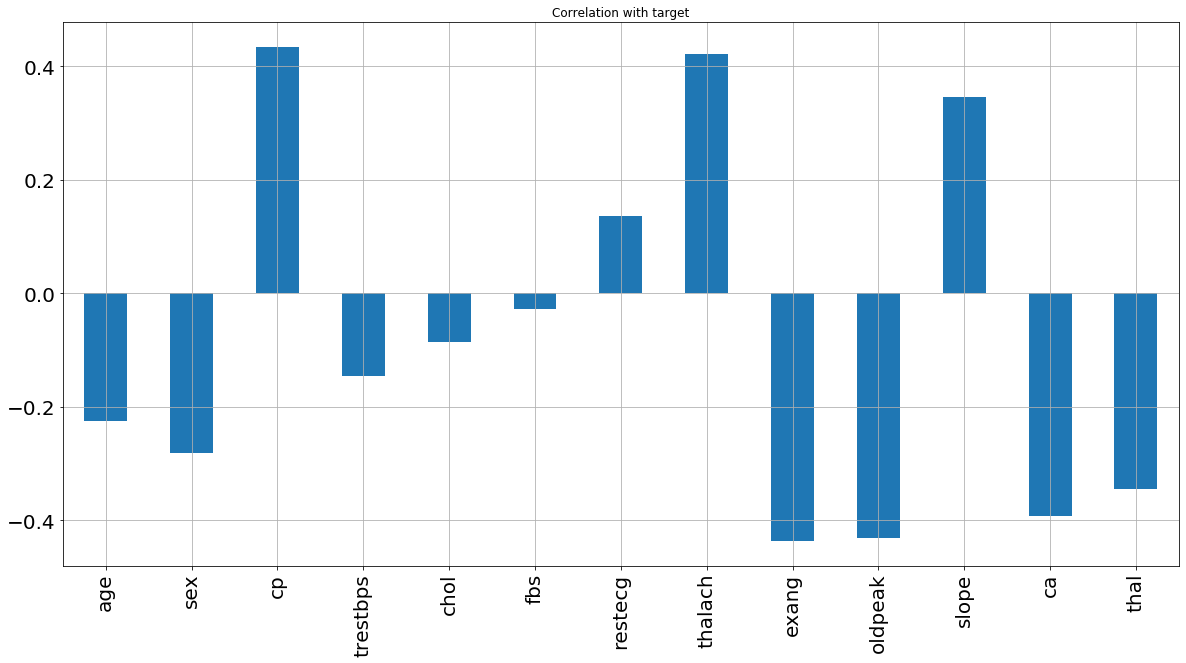

In [9]:
X.corrwith(df['target']).plot.bar(figsize=(20,10), title='Correlation with target', rot=90, grid=True, fontsize=20)

# PCA

* PCA is a technique which helps us in extracting a new set of variables from an existing large set of variables. These newly extracted variables are called Principal Components. You can refer to this article to learn more about PCA. For your quick reference, below are some of the key points you should know about PCA before proceeding further:

* A principal component is a linear combination of the original variables Principal components are extracted in such a way that the first principal component explains maximum variance in the dataset Second principal component tries to explain the remaining variance in the dataset and is uncorrelated to the first principal component Third principal component tries to explain the variance which is not explained by the first two principal components and so on

***As the dataset is small having less features we will use only 2 components or dimensions to see how much much variance it is covering.***

In [10]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(feat.values)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

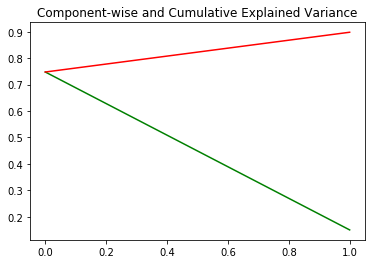

In [19]:
plt.plot(range(2), pca.explained_variance_ratio_, color='green')
plt.plot(range(2), np.cumsum(pca.explained_variance_ratio_), color='red')
plt.title("Component-wise and Cumulative Explained Variance")

In [21]:
def pca_results(good_data, pca):



    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions


    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)

    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)

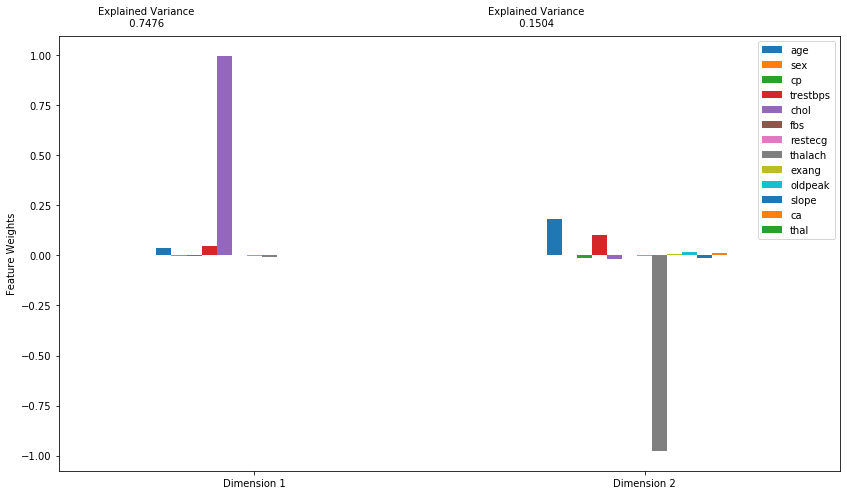

In [22]:
pca_results = pca_results(feat, pca)

# Inference

First 2 Principal components:

**1st PC: 74.76% 2nd PC: 15.04%**

**Total: 89.8%**

* **First dimension:** From the above plot it is noticed that the weight is large and positive for chol, while being slightly positive for sex and cp which means that customers who score highly in this component will have very little dimpact on heart disease whereas people having higher cholestrol have greater chances of heart disease.

* **Second Dimension:** From the above plot it is noticed that the weight is large and negative for thalach and slightly negative for cp,chol and slope, which means that patients who score high in this component will have very less chances of heart disease. Whereas age and trestbps are moderatively positive.

# The End!